# Cleaning and plot tips

(I don't really have a useful name for this Notebook.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api

saf = pd.read_csv("data/Safiya_extract_3-1-2023.csv")
theo = pd.read_csv("data/Theo_Extract_2-21-2023.csv")


## Recoding variables

[pandas.Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) maps values in a `Series` to a new set of values. You can pass a `dict` that maps `old_value: new_value` or a function/lambda that returns the correct value. Here is an example using a function.

In [24]:
def recode_educ(educ):
    """Reduce GSS's `educ` variable to a few categories.

    Parameters
    ----------
    educ : int
        Sentinel value GSS' `educ` variable.

    Returns
    -------
    str
        String representing the input's collapsed category.
    """
    if educ == 0:
        # This can be collapsed into "Less than high school too"
        return "No schooling"
    elif educ < 13:
        return "Less than high school"
    elif educ < 17:
        return "College"
    elif educ < 19:
        return "Master's"
    elif educ >= 19 and educ < 97:
        return "PhD/Doctorate"
    else:
        return np.nan


# Map the function over all of `educ`
saf["educ_cat"] = saf["educ"].map(recode_educ)


## Frequency table

[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) calculates a frequency table.

The table is a `Series` which you may customize as you wish.

In [28]:
# Calculate a frequency table and return that as a DataFrame
education_tab = saf.educ_cat.value_counts().to_frame()
# Calculate percents
education_tab = education_tab.assign(perc=education_tab / education_tab.sum() * 100)
# Cumulative sum
education_tab = education_tab.assign(perc_cumulative=education_tab.perc.cumsum())
# Sort table by percent
education_tab = education_tab.sort_values(by="perc", ascending=False)

education_tab

,educ_cat,perc,perc_cumulative
College,7029,44.722275,44.722275
Less than high school,6026,38.340650,83.062925
Master's,1643,10.453649,93.516574
PhD/Doctorate,988,6.286187,99.802761
No schooling,31,0.197239,100.000000


You can reorganize the table by reindexing using [reindex()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html). For example, let's say you'd like to organize the table so that it follows the order of the ordinal variable.

In [32]:
education_tab = education_tab.reindex(["No schooling", "Less than high school", "College", "Master's", "Ph. D/Doctorate"])

education_tab

,educ_cat,perc,perc_cumulative
No schooling,31.0,0.197239,100.000000
Less than high school,6026.0,38.340650,83.062925
College,7029.0,44.722275,44.722275
Master's,1643.0,10.453649,93.516574
Ph. D/Doctorate,NaN,NaN,NaN


You can also use `pandas`' [Categorical](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) type which supports ordering.

In [ ]:
educ_cat = pd

# Plots

A quick horizontal bar chart using the recoded `educ`.

* [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) - Returns a `Figure` and an `Axes` to plot on. This is cleaner than the `pyplot` interface.
* [Axes.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html) - Draws a horizontal bar plot on the `Axes` obtained by calling `subplots()`.
* [Axes.set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) - Sets an `Axes` title. Click the link if you'd like to see other parameters you can use to customize the title.

**Note:** I skipped setting axis labels because the title explains the plot.

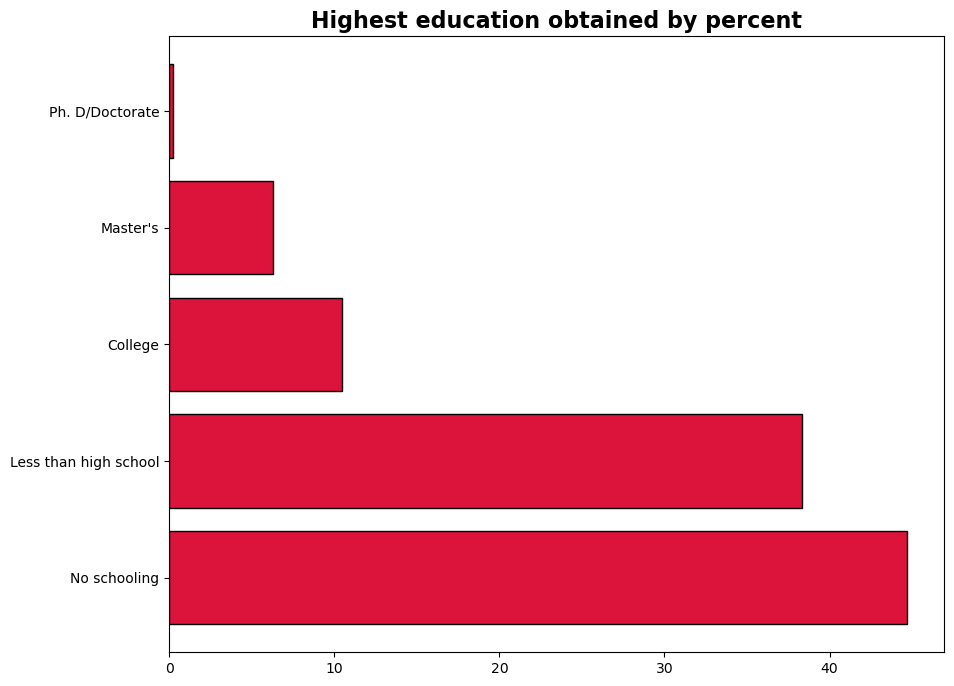

In [27]:
bar_fig, bar_ax = plt.subplots(figsize=(10, 8))
bar_ax.barh(education_tab.index, education_tab.perc, edgecolor="black", color="crimson")

# Axis titles
_ = bar_ax.set_title(
    "Highest education obtained by percent", fontweight="bold", fontsize=16
)


<AxesSubplot: xlabel='age', ylabel='coninc'>

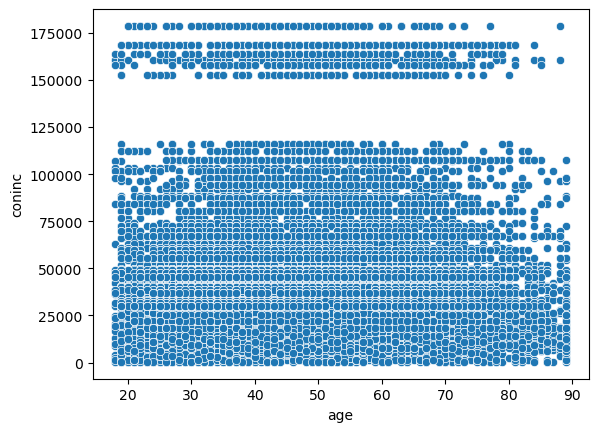

In [16]:
# saf["income_new"] = saf.coninc * saf.wtssnrps
saf
sns.scatterplot(x="age", y="coninc", data=saf)
